In [3]:
%load_ext autoreload
%autoreload 2

### **IMPORTING LIBRARY AND SETTING PATH**

In [2]:
# Needed Libraries
import numpy as np
from scipy import signal as sig
from Signal_Analysis_Class import heart_rate
import wfdb as wf
import pywt as WT
import matplotlib.pyplot as plt
import os

# Specify the default path
os.chdir('..')
dir = os.getcwd()

### **Signal Filtering Processes**

Reason for admission: Healthy control


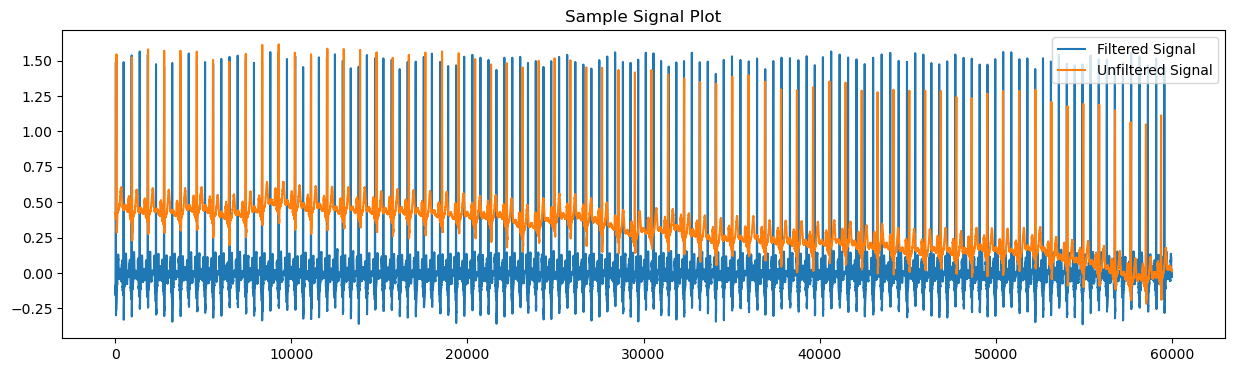

In [13]:
# Reading Healthy Control Patient Data
signal_array, fields = wf.rdsamp( dir + '/DATASET/patient255/s0491_re')
print(fields['comments'][4])

# Manipulation of single signal 
signal = signal_array[:,1]


# Wavelet Tranformation
Coeff = WT.wavedec(signal, 'db3', level = 11)
Coeff_Mod = []

for i in range(0,11):
    if i > 3:
        Coeff_Mod.append(Coeff[i])
    else:
        Coeff_Mod.append(np.zeros(Coeff[i].shape))

# Inverse Wavelet Transform
signal_WT = WT.waverec(Coeff_Mod, 'db3')


# Notch Filter
samp_freq = 1000
notch_freq = 60.0
quality_factor = 2

b_notch, a_notch = sig.iirnotch(notch_freq, quality_factor, samp_freq)
signal_notch = sig.filtfilt(b_notch, a_notch, signal_WT)



# Fourth order Butterworth low pass filter at 100Hz
sos = sig.butter(N = 4, Wn = 100,output ='sos', fs=1000)
signal_filtered = sig.sosfilt(sos, signal_notch)

plt.figure(figsize = (15,4), dpi = 100)
plt.plot(signal_filtered[:60000])
plt.plot(signal[:60000])

plt.title('Sample Signal Plot')
plt.legend(['Filtered Signal', 'Unfiltered Signal'])

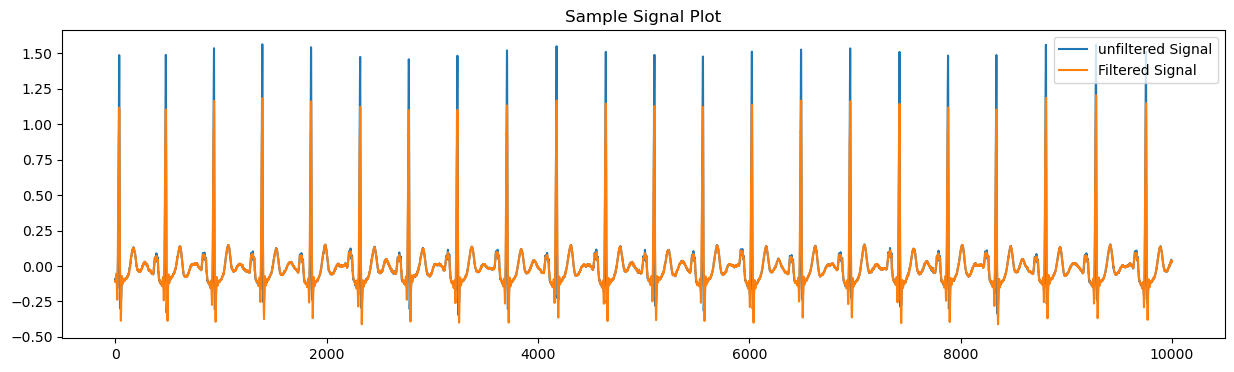

In [20]:
plt.figure(figsize = (15,4), dpi = 100)
plt.plot(signal_WT[:10000])
plt.plot(signal_notch[:10000])


plt.title('Sample Signal Plot')
plt.legend(['unfiltered Signal', 'Filtered Signal'])

### **Pan Tompkins Algorithm for R Peaks**

Text(0.5, 1.0, 'R Peak Locations')

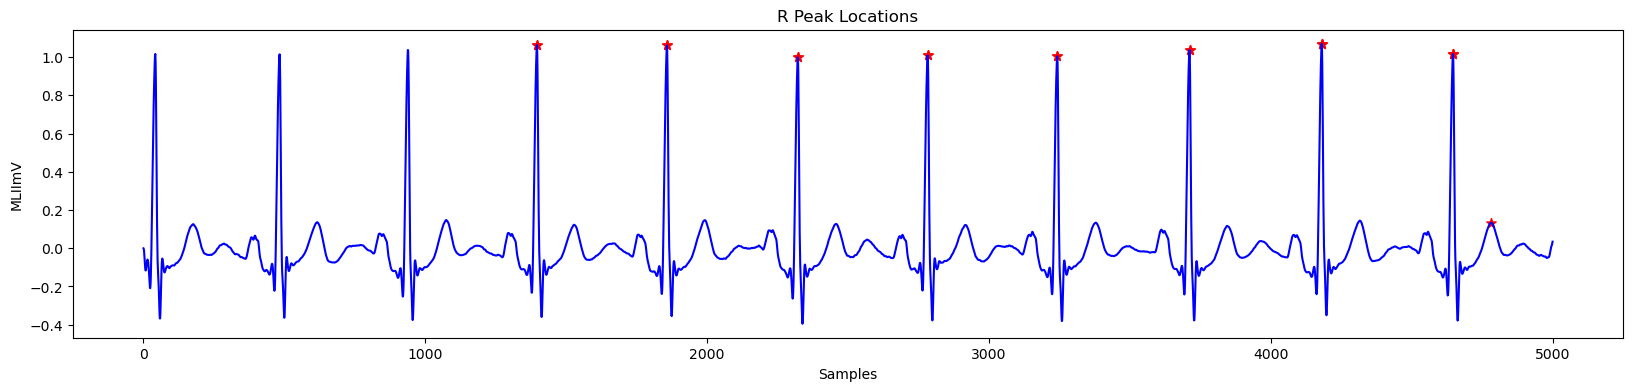

In [4]:
S = signal_filtered[:5000]

hr = heart_rate(S,1000)
result = hr.find_r_peaks()
result = np.array(result)

result = result[result > 0]

plt.figure(figsize = (20,4), dpi = 100)
plt.plot(S, color = 'blue')        
plt.scatter(result, S[result], color = 'red', s = 50, marker= '*')
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("R Peak Locations")